# Term Deposit Marketing

## Building a Robust Solution for Term Deposit Subscription Prediction

As a growing participant in the European banking sector, effectively addressing challenges such as fraud detection, sentiment analysis, and customer behavior insights is essential to achieving success. Even modest datasets represent valuable resources that can drive solutions to these challenges while enhancing customer satisfaction.

We have collected a dataset derived from customer interactions, focusing specifically on calls aimed at promoting our service subscription: term deposits. This dataset includes features related to both customers and call details. To maintain strict adherence to customer privacy regulations, all personal identifying information has been removed.

### Objectives

To ensure a robust and effective solution, we adopt a three-layer approach:

#### 1. Exploratory Analysis
We begin with an in-depth exploratory analysis to:
- Understand the dataset's structure.
- Examine its shape and key characteristics.
- Summarize key outputs to identify patterns, detect potential issues, and gain initial insights for informed decision-making.

#### 2. High-Accuracy Filtering Model
The first layer focuses on building a high-accuracy machine learning model to:
- Filter out cases with a high likelihood of failure.
- Minimize unsuccessful calls, improving efficiency and resource allocation.

#### 3. High-Precision Persuasion Model
The second layer employs a high-precision model designed to:
- Predict whether a customer is likely to be persuaded to subscribe to the term deposit.
- Target customers who pass the first stage for focused and effective follow-ups.

#### 4. Clustering-Based Success Analysis
The final layer applies a clustering approach to:
- Divide the dataset features into five distinct clusters.
- Provide insights into the probability of success within each cluster.
- Enable better strategic decisions and personalized engagement strategies.

### Conclusion

By integrating these layers, we aim to maximize the success rate of term deposit subscriptions. This approach leverages machine learning and clustering techniques to deliver targeted, efficient, and data-driven solutions that align with business objectives.


## Exploratory Data Analysis

In the first step, we analyze the collected call data. This analysis provides insights into both the quantity and quality of the input data for each feature. Additionally, it examines the ratio of successful sales to the total number of calls, offering valuable information about the overall success rate.

In [12]:
import pandas as pd
import logging
logging.getLogger().disabled = True
import warnings
warnings.filterwarnings("ignore")



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
term_deposit_marketing_2020=pd.read_csv("term-deposit-marketing-2020.csv")

### The dataset schema

In [15]:
term_deposit_marketing_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [16]:
term_deposit_marketing_2020.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


The dataset comprises 13 input features along with an output variable that indicates the outcome of a marketing call. The output variable (y) specifies whether the customer agreed to the term deposit subscription. The input features encompass various aspects of customer information, including demographic details such as age, job, marital status, and education level. Additionally, the dataset reflects the customers' financial status through features like account balance, loan status, and housing information. It also includes details about the customers' interaction with the campaign, such as the number of contacts made, the duration of the last call (in seconds), and the date of the most recent contact.

## Data Analysis

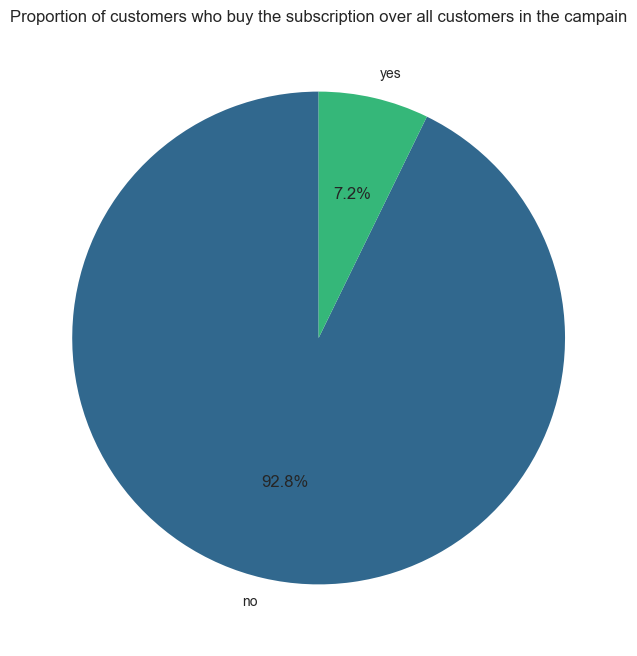

In [17]:
# Calculate the value counts
counts = term_deposit_marketing_2020["y"].value_counts()

# Prepare the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts.values, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("viridis", len(counts))
)

# Title
plt.title(f'Proportion of customers who buy the subscription over all customers in the campain')
plt.show()


The analysis shows that approximately 93% of customers decline to join the campaign.

In [58]:
average_values = term_deposit_marketing_2020[['campaign', 'duration']].mean()

# Display the results
print(average_values)

campaign      2.882175
duration    254.824300
dtype: float64


The average call duration is over 250 seconds, with customers receiving an average of slightly fewer than three calls each. Approximately 37,000 calls were unsuccessful, indicating that more than 7,700 employee hours were spent during the campaign without yielding the desired results.

## Solution

Through this investigation, we propose a multi-faceted solution based on data-driven models to optimize campaign efficiency and effectiveness:

## 1. Develop a Machine Learning Model for Success Prediction
Design a predictive model to estimate the likelihood of success for each customer. This model can be used to prune customers with a lower probability of conversion, reducing wasted resources and improving campaign focus.

## 2. Refined Model for Future Engagement
Build a specialized predictive model to identify customers who are more likely to accept the campaign in future calls. This approach ensures that such customers remain part of the campaign, even if they decline during the current interaction.

## 3. Customer Clustering and Success Analysis
Implement a clustering algorithm to group customers based on their features. Compute the success probability for each cluster, leveraging shared characteristics within clusters to develop targeted strategies for improved campaign outcomes.


In [25]:
from pycaret.classification import *
os.environ["PYTHONWARNINGS"] = "ignore"
warnings.filterwarnings("ignore")
logging.getLogger("LightGBM").setLevel(logging.ERROR)

In [56]:


clf_setup = setup(verbose=False,
    data=term_deposit_marketing_2020,
    target='y',  # The target column
    categorical_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'],
    numeric_features=['age', 'balance', 'day', 'duration', 'campaign'],
    session_id=123,  # For reproducibility
    feature_selection=True
)

In [57]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9329,0.8760,0.9329,0.9190,0.9218,0.3428,0.3687,0.6320
lr,Logistic Regression,0.9325,0.8704,0.9325,0.9164,0.9174,0.2859,0.3286,1.2890
lightgbm,Light Gradient Boosting Machine,0.9320,0.8693,0.9320,0.9169,0.9197,0.3197,0.3490,0.3270
lda,Linear Discriminant Analysis,0.9309,0.8698,0.9309,0.9225,0.9257,0.4097,0.4161,0.2480
ada,Ada Boost Classifier,0.9306,0.8718,0.9306,0.9158,0.9193,0.3228,0.3468,0.4460
ridge,Ridge Classifier,0.9302,0.8698,0.9302,0.9107,0.9073,0.1675,0.2367,0.3010
nb,Naive Bayes,0.9282,0.8641,0.9282,0.9202,0.9234,0.3954,0.4004,0.2780
qda,Quadratic Discriminant Analysis,0.9279,0.8640,0.9279,0.9200,0.9232,0.3943,0.3991,0.2440
dummy,Dummy Classifier,0.9276,0.5000,0.9276,0.8605,0.8928,0.0000,0.0000,0.2560
knn,K Neighbors Classifier,0.9262,0.7671,0.9262,0.9103,0.9153,0.2952,0.3131,1.2230


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Based on the model search results from PyCaret, we select a model that delivers the highest accuracy (calculated as 
True Predictions
/
All Predictions
True Predictions/All Predictions) to ensure an overall correct prediction rate. Additionally, we choose a model with the highest precision (calculated as 
True Positives
/
(
True Positives
+
False Positives
)
True Positives/(True Positives+False Positives)) to focus on identifying true positive cases more reliably. This precision-oriented approach helps us better identify potential customers who are likely to convert, even if the initial call does not result in a sale, allowing us to follow up effectively and increase the overall success rate in future interactions.

### Solution #1

We have selected the Gradient Boosting Classifier as the best-performing model in terms of accuracy.

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold


In [28]:
# preprocessing
x=term_deposit_marketing_2020.iloc[:,:len(term_deposit_marketing_2020.columns)-1]
y=term_deposit_marketing_2020["y"]
categorical_transformer=OneHotEncoder(drop="first")

numerical_transformer=StandardScaler()
categorical_features=["job","marital","education","default","housing","loan","contact","month"]
numericak_features=["age","balance","day","duration","campaign"]

preprocessor=ColumnTransformer(
    transformers=[
        ("num",numerical_transformer,numericak_features),
        ("cat",categorical_transformer,categorical_features)
    ]
)

x_processed=preprocessor.fit_transform(x)
x_processed=pd.DataFrame(x_processed.toarray(),columns=preprocessor.get_feature_names_out())
y_processed=y.map({"yes":1,"no":0})

In [19]:
random_states=[392, 406, 393, 221, 845, 638, 226, 958, 660, 491]

In [24]:
all_random_seeds_results = []

for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)

    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]

        
        adaboost_classifier = GradientBoostingClassifier(random_state=state)

        # Fit the model
        adaboost_classifier.fit(X_train, Y_train)

        # Make predictions
        Y_pred = adaboost_classifier.predict(X_test)

        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))

# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)


Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.936625   0.926634  0.936625  0.929295          392     1
1   0.938125   0.927776  0.938125  0.929743          392     2
2   0.936625   0.926634  0.936625  0.929295          392     3
3   0.938625   0.928378  0.938625  0.930142          392     4
4   0.933500   0.922129  0.933500  0.925355          392     5
5   0.936125   0.924940  0.936125  0.927384          406     1
6   0.935125   0.924666  0.935125  0.927622          406     2
7   0.936125   0.925772  0.936125  0.928491          406     3
8   0.938250   0.928796  0.938250  0.931148          406     4
9   0.937750   0.928050  0.937750  0.930448          406     5
10  0.935875   0.924716  0.935875  0.927275          393     1
11  0.937500   0.927327  0.937500  0.929663          393     2
12  0.933875   0.922554  0.933875  0.925714          393     3
13  0.938875   0.929818  0.938875  0.932115          393     4
14  0.939250   0.930304  0.939250  0.

Using the Gradient Boosting Classifier, trained on our dataset and validated with 5-fold cross-validation, we developed a predictive model to identify customers unlikely to show interest in our service. By excluding these individuals from the potential customer list, we can significantly optimize campaign efforts. Achieving an accuracy of 93%, the model has the potential to reduce 93% of the 7,700 employee hours spent during the previous campaign, saving over 7,000 hours.

### Solution #2

We have chosen Linear Discriminant Analysis as the second solution, as it delivers the highest precision.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
all_random_seeds_results = []

for state in random_states:
    # Initialize stratified K-Fold cross-validator with 5 splits
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=state)

    for fold, (train_index, test_index) in enumerate(skf.split(x_processed, y_processed)):
        # Split the data into training and testing sets for the fold
        X_train, X_test = x_processed.iloc[train_index], x_processed.iloc[test_index]
        Y_train, Y_test = y_processed.iloc[train_index], y_processed.iloc[test_index]

        # Initialize Linear Discriminant Analysis classifier
        lda_classifier = LinearDiscriminantAnalysis()

        # Fit the model
        lda_classifier.fit(X_train, Y_train)

        # Make predictions
        Y_pred = lda_classifier.predict(X_test)

        # Calculate metrics
        metrics = {
            "accuracy": accuracy_score(Y_test, Y_pred),
            "precision": precision_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "recall": recall_score(Y_test, Y_pred, average='weighted', zero_division=0),
            "f1_score": f1_score(Y_test, Y_pred, average='weighted', zero_division=0),
        }

        # Add the random seed and fold number for traceability
        metrics["random_seed"] = state
        metrics["fold"] = fold + 1

        # Append results
        all_random_seeds_results.append(pd.DataFrame([metrics]))

# Combine results from all random seeds and folds into a single DataFrame
combined_results = pd.concat(all_random_seeds_results, ignore_index=True)

# Calculate average metrics across all random seeds and folds
average_metrics = combined_results.groupby("random_seed").mean(numeric_only=True).mean()

# Display combined results and average metrics
print("Combined Results:")
print(combined_results)
print("\nAverage Metrics:")
print(average_metrics)

Combined Results:
    accuracy  precision    recall  f1_score  random_seed  fold
0   0.932500   0.927291  0.932500  0.929536          392     1
1   0.933250   0.925518  0.933250  0.928473          392     2
2   0.932625   0.926879  0.932625  0.929304          392     3
3   0.934750   0.928634  0.934750  0.931108          392     4
4   0.930250   0.923470  0.930250  0.926294          392     5
5   0.934375   0.927243  0.934375  0.929996          406     1
6   0.932875   0.927553  0.932875  0.929830          406     2
7   0.931750   0.924950  0.931750  0.927731          406     3
8   0.935750   0.930397  0.935750  0.932614          406     4
9   0.930125   0.923590  0.930125  0.926339          406     5
10  0.933875   0.926113  0.933875  0.929035          393     1
11  0.933250   0.927525  0.933250  0.929926          393     2
12  0.930750   0.923506  0.930750  0.926457          393     3
13  0.932250   0.927117  0.932250  0.929340          393     4
14  0.936500   0.931242  0.936500  0.

For our second solution, we trained a Linear Discriminant Analysis (LDA) model on our dataset to develop a high-precision predictive model with an accuracy of 92.6%. This model effectively identifies potential customers, allowing employees to concentrate their efforts on these individuals. By targeting these prospects, even if the initial sales call was unsuccessful, the model helps enhance the overall success rate in future interactions.

### Solution #3

In [27]:
from pycaret.clustering import *

In [34]:
clustering_setup = setup(x_processed, normalize=True, session_id=42)

# Compare clustering models
best_model = compare_models()


,Description,Value
0,Session id,42
1,Target,cat__month_oct
2,Target type,Binary
3,Original data shape,"(40000, 36)"
4,Transformed data shape,"(40000, 36)"
5,Transformed train set shape,"(28000, 36)"
6,Transformed test set shape,"(12000, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9992,0.9995,0.6933,0.8840,0.7660,0.7656,0.7768,0.0660
ada,Ada Boost Classifier,0.9992,0.9976,0.8067,0.8089,0.7921,0.7917,0.7995,0.2110
et,Extra Trees Classifier,0.9984,0.9885,0.2467,0.7667,0.3635,0.3630,0.4264,0.1940
svm,SVM - Linear Kernel,0.9982,0.9798,0.3067,0.5567,0.3841,0.3834,0.4059,0.0630
knn,K Neighbors Classifier,0.9981,0.7720,0.0867,0.4000,0.1405,0.1402,0.1839,0.1740
rf,Random Forest Classifier,0.9981,0.9973,0.0533,0.3000,0.0905,0.0903,0.1263,0.2490
ridge,Ridge Classifier,0.9980,0.9981,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490
qda,Quadratic Discriminant Analysis,0.9980,0.9673,0.0000,0.0000,0.0000,0.0000,0.0000,0.0840
dummy,Dummy Classifier,0.9980,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0550
gbc,Gradient Boosting Classifier,0.9978,0.9965,0.3400,0.5200,0.3910,0.3901,0.4087,0.5150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [41]:
data_encoded = term_deposit_marketing_2020.copy()
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "y"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

In [47]:
numerical_columns = ["age", "balance", "day", "duration", "campaign"]
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Set number of clusters
data_encoded['cluster'] = kmeans.fit_predict(data_encoded[numerical_columns])

In [48]:
cluster_analysis = data_encoded.groupby('cluster')['y'].value_counts(normalize=True).unstack() * 100

# Display results
print("Percentage of 'y' labels in each cluster:")
print(cluster_analysis)

Percentage of 'y' labels in each cluster:
y                0          1
cluster                      
0        97.601476   2.398524
1        56.360525  43.639475
2        92.735849   7.264151
3        96.175213   3.824787
4        96.495136   3.504864


In [49]:
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,cluster
0,1.810415,4,1,2,0,0.299174,1,0,2,-1.330900,8,0.023811,-0.581096,0,4
1,0.358382,9,2,1,0,-0.428854,1,0,2,-1.330900,8,-0.400305,-0.581096,0,4
2,-0.782501,2,1,1,0,-0.438152,1,1,2,-1.330900,8,-0.689474,-0.581096,0,3
3,0.669532,1,1,3,0,0.079802,1,0,2,-1.330900,8,-0.627785,-0.581096,0,4
4,-0.782501,11,2,3,0,-0.438497,0,0,2,-1.330900,8,-0.219092,-0.581096,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,9,1,2,0,-0.302809,0,0,0,-1.572504,6,-0.569951,-0.581096,0,4
39996,-1.093650,4,2,2,0,0.711402,0,0,0,-1.572504,6,-0.064868,0.036377,1,3
39997,1.395549,0,0,1,0,-0.369964,0,0,0,-1.572504,6,-0.327048,-0.581096,1,4
39998,-0.678784,4,1,2,0,-0.078271,0,0,0,-1.572504,6,0.336114,-0.581096,0,3


In [51]:
# Calculate feature intervals (min, max, mean) for each cluster
cluster_summary = data_encoded.groupby('cluster')[numerical_columns].agg(['min', 'max', 'mean'])

# Add categorical feature distributions for each cluster (optional)
categorical_summary = data_encoded.groupby('cluster')[categorical_columns[:-1]].agg(lambda x: x.mode()[0])

# Combine results
cluster_description = pd.concat([cluster_summary, categorical_summary], axis=1)

# Display feature intervals for each cluster
print("Feature Intervals and Descriptions for Each Cluster:")
print(cluster_description)


Feature Intervals and Descriptions for Each Cluster:
         (age, min)  (age, max)  (age, mean)  (balance, min)  (balance, max)  \
cluster                                                                        
0         -2.234533    5.647931    -0.032309       -0.994333        4.402512   
1         -2.027100    3.469881    -0.117898       -1.491968        4.283011   
2         -2.130817    4.610764     0.211222        2.037282       34.732087   
3         -2.234533    0.254666    -0.694244       -3.200458        2.321399   
4          0.150949    5.544214     1.066578       -2.796840        2.507710   

         (balance, mean)  (day, min)  (day, max)  (day, mean)  \
cluster                                                         
0              -0.122111   -1.693306    1.809946     0.761660   
1              -0.052194   -1.814107    1.809946    -0.014933   
2               4.365861   -1.814107    1.809946     0.026752   
3              -0.157995   -1.814107    1.809946    -0.032321

In [52]:
cluster_description

,"(age, min)","(age, max)","(age, mean)","(balance, min)","(balance, max)","(balance, mean)","(day, min)","(day, max)","(day, mean)","(duration, min)",...,"(campaign, max)","(campaign, mean)",job,marital,education,default,housing,loan,contact,month
cluster,,,,,,,,,,,,,,,,,,,,,
0,-2.234533,5.647931,-0.032309,-0.994333,4.402512,-0.122111,-1.693306,1.809946,0.761660,-0.982500,...,18.560550,3.663932,4,1,1,0,1,0,0,1
1,-2.027100,3.469881,-0.117898,-1.491968,4.283011,-0.052194,-1.814107,1.809946,-0.014933,0.983854,...,4.049948,-0.135339,1,1,1,0,1,0,0,8
2,-2.130817,4.610764,0.211222,2.037282,34.732087,4.365861,-1.814107,1.809946,0.026752,-0.978644,...,8.680991,-0.106923,4,1,2,0,1,0,0,9
3,-2.234533,0.254666,-0.694244,-3.200458,2.321399,-0.157995,-1.814107,1.809946,-0.032321,-0.982500,...,2.197530,-0.181807,1,1,1,0,1,0,0,8
4,0.150949,5.544214,1.066578,-2.796840,2.507710,-0.076668,-1.814107,1.809946,-0.041361,-0.982500,...,2.815003,-0.124124,1,1,1,0,1,0,0,8
